In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=18)

# Loading Data

In [25]:
data_J1 = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Calibration AO/s0243.fits')
data_J2 = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Calibration AO/s0244.fits')

data_FeII1 = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Calibration AO/s0247.fits')
data_FeII2 = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Calibration AO/s0248.fits')

data_BrG1 = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Calibration AO/s0245.fits')
data_BrG2 = fits.open('C:\\Users\\dougl\\Desktop\\Githubwork\\Calibration AO/s0246.fits')

In [37]:
J1 = np.asarray(data_J1[0].data)
J2 = np.asarray(data_J2[0].data)

FeII1 = np.asarray(data_FeII1[0].data)
FeII2 = np.asarray(data_FeII2[0].data)

BrG1 = np.asarray(data_BrG1[0].data)
BrG2 = np.asarray(data_BrG2[0].data)

# Basic Plots to Check Dither

(1000.0, 500.0)

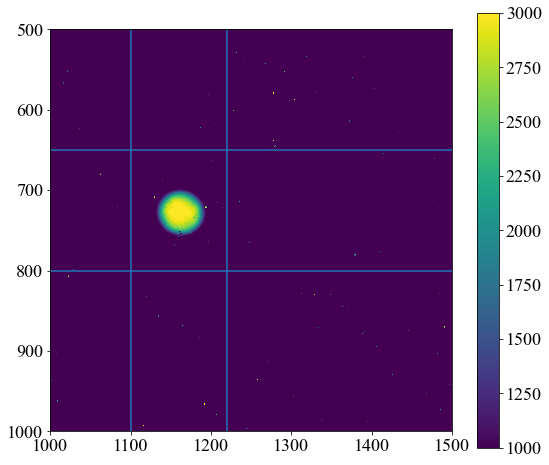

In [45]:
plt.figure(figsize=(9,8))
Z=plt.imshow(J1,vmin=1000,vmax=3000)
plt.colorbar(Z)
plt.axvline(1100)
plt.axvline(1220)
plt.axhline(800)
plt.axhline(650)
plt.xlim(1000,1500)
plt.ylim(1000,500)

(1000.0, 500.0)

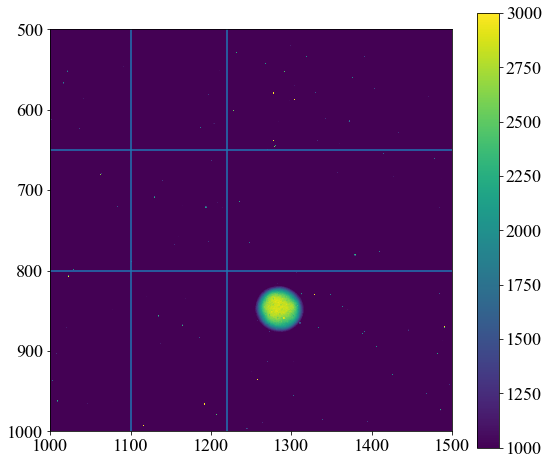

In [44]:
plt.figure(figsize=(9,8))
Z=plt.imshow(J2,vmin=1000,vmax=3000)
plt.colorbar(Z)
plt.axvline(1100)
plt.axvline(1220)
plt.axhline(800)
plt.axhline(650)
plt.xlim(1000,1500)
plt.ylim(1000,500)

# Subtracting Dither and Plotting each Band

(500.0, 1000.0)

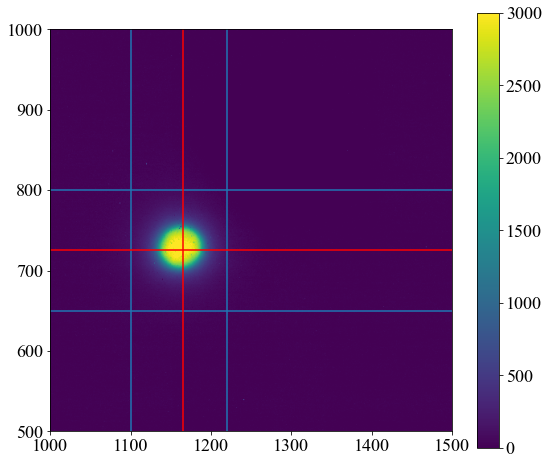

In [70]:
J_test = J1 - J2

plt.figure(figsize=(9,8))
Z=plt.imshow(J_test, vmin=0, vmax=3000)
plt.colorbar(Z)
plt.axvline(1100)
plt.axvline(1220)
plt.axhline(800)
plt.axhline(650)

plt.axvline(1165, c='r')
plt.axhline(725, c='r')


plt.xlim(1000,1500)
plt.ylim(500,1000)

(500.0, 1000.0)

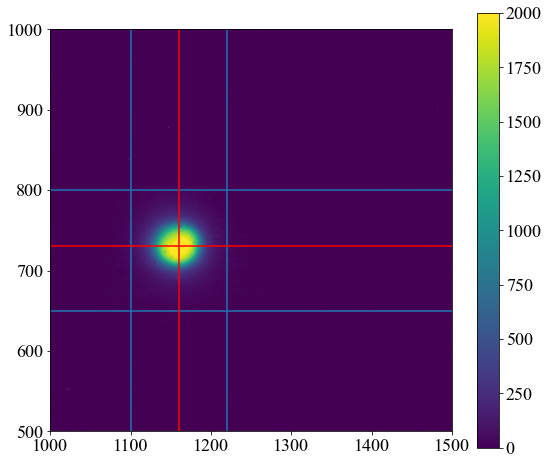

In [74]:
FeII_test = FeII1 - FeII2

plt.figure(figsize=(9,8))
Z=plt.imshow(FeII_test, vmin=0, vmax=2000)
plt.colorbar(Z)
plt.axvline(1100)
plt.axvline(1220)
plt.axhline(800)
plt.axhline(650)

plt.axvline(1160, c='r')
plt.axhline(730, c='r')

plt.xlim(1000,1500)
plt.ylim(500,1000)

(500.0, 1000.0)

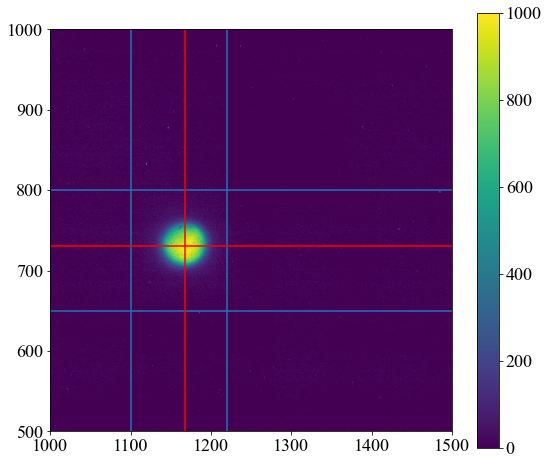

In [77]:
BrG_test = BrG2 - BrG1

plt.figure(figsize=(9,8))
Z=plt.imshow(BrG_test, vmin=0, vmax=1000)
plt.colorbar(Z)
plt.axvline(1100)
plt.axvline(1220)
plt.axhline(800)
plt.axhline(650)

plt.axvline(1168, c='r')
plt.axhline(730, c='r')

plt.xlim(1000,1500)
plt.ylim(500,1000)

# Creating RGB figures

In [79]:
#Centering every frame on Ganymede so that the rgb figure is correct

import photutils

xcJ, ycJ = photutils.centroids.centroid_sources(J_test, 1165, 725)
xcFeII, ycFeII = photutils.centroids.centroid_sources(FeII_test, 1160, 730)
xcBrG, ycBrG = photutils.centroids.centroid_sources(BrG_test, 1168, 730)


J_test2 = J_test[int(ycJ)-200:int(ycJ)+200, int(xcJ)-200:int(xcJ)+200]
FeII_test2 = FeII_test[int(ycFeII)-200:int(ycFeII)+200, int(xcFeII)-200:int(xcFeII)+200]
BrG_test2 = BrG_test[int(ycBrG)-200:int(ycBrG)+200, int(xcBrG)-200:int(xcBrG)+200]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


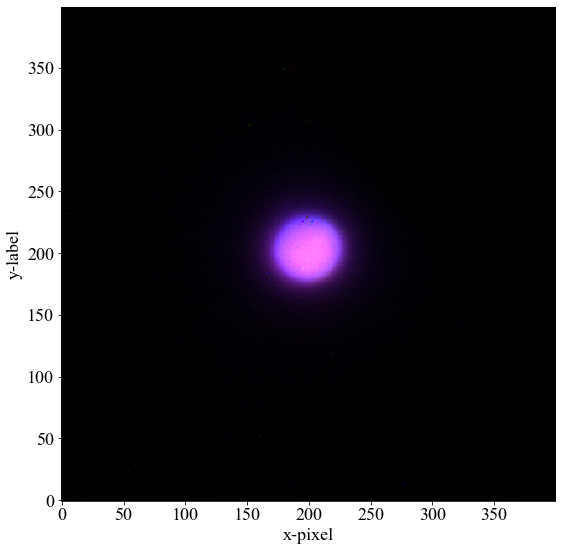

In [90]:
rgb_img = np.stack((FeII_test2, BrG_test2, J_test2), axis=-1)

rgb_img = (rgb_img - 0) / (2000)
rgb_img.shape

fig, ax = plt.subplots(figsize=(9, 8))

im = ax.imshow(rgb_img, 
               interpolation='none', origin='lower')

plt.xlabel("x-pixel")
plt.ylabel("y-label")
fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


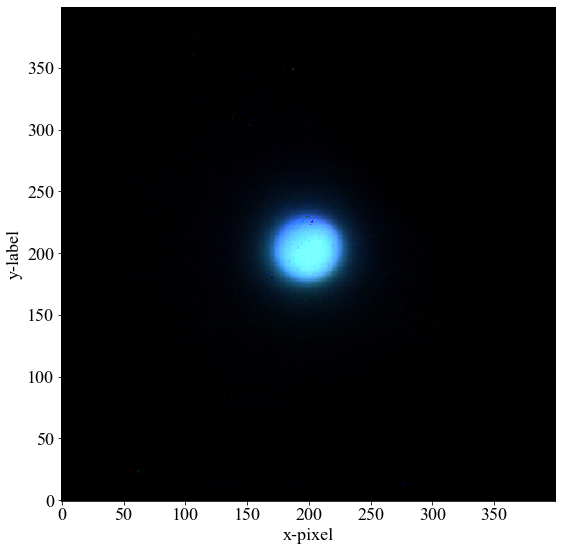

In [91]:
rgb_img = np.stack((BrG_test2, FeII_test2, J_test2), axis=-1)

rgb_img = (rgb_img - 0) / (2000)
rgb_img.shape

fig, ax = plt.subplots(figsize=(9, 8))

im = ax.imshow(rgb_img, 
               interpolation='none', origin='lower')

plt.xlabel("x-pixel")
plt.ylabel("y-label")
fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


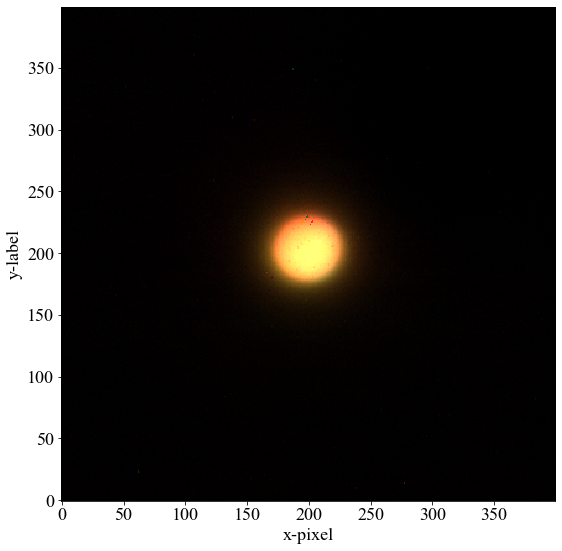

In [92]:
rgb_img = np.stack((J_test2, FeII_test2, BrG_test2), axis=-1)

rgb_img = (rgb_img - 0) / (2000)
rgb_img.shape

fig, ax = plt.subplots(figsize=(9, 8))

im = ax.imshow(rgb_img, 
               interpolation='none', origin='lower')

plt.xlabel("x-pixel")
plt.ylabel("y-label")
fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


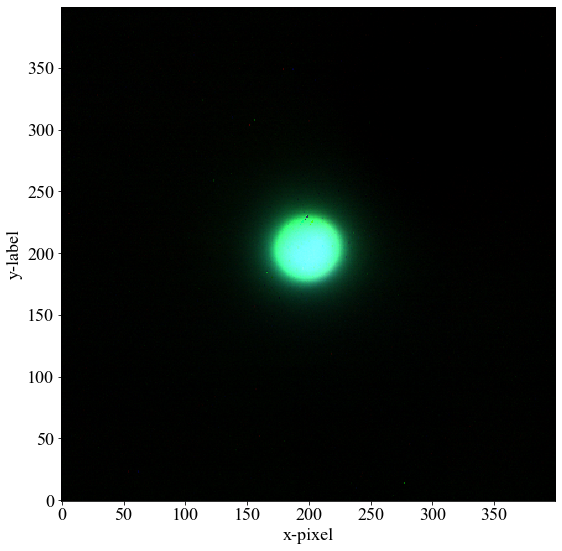

In [93]:
rgb_img = np.stack((BrG_test2, J_test2, FeII_test2), axis=-1)

rgb_img = (rgb_img - 0) / (2000)
rgb_img.shape

fig, ax = plt.subplots(figsize=(9, 8))

im = ax.imshow(rgb_img, 
               interpolation='none', origin='lower')

plt.xlabel("x-pixel")
plt.ylabel("y-label")
fig.tight_layout()